In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading MPG dataset ##

In [3]:
mpg = pd.read_csv("mpg2.csv")
print(mpg.shape)
mpg.head()

(400, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Question 1. Check if there are any null or NA

In [4]:
mpg.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [5]:
print(mpg.shape)
mpg.dropna(inplace=True)
print(mpg.shape)

(400, 9)
(393, 9)


## Question 3. Check if there is any outliers in the mpg field

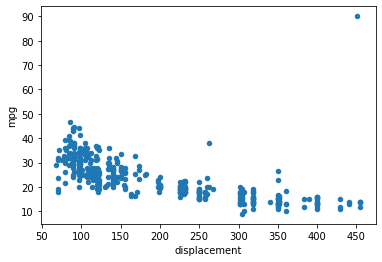

In [6]:
mpg.plot.scatter(x='displacement', y='mpg')

In [7]:
mpg.mpg.describe()

count    393.000000
mean      23.615267
std        8.487261
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       90.000000
Name: mpg, dtype: float64

## Question 4. Display and then Remove the one outlier row. You should now have 392 rows

In [8]:
mpg[ mpg.mpg > 80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
9,90.0,8,451.0,450.0,2555,8.0,2020,usa,tesla model Y


In [9]:
mpg = mpg[mpg.mpg < 80]
mpg.shape

(392, 9)

## Question 5. Calculate the average acceleration cars made in usa using SQL

In [10]:
mpg = sns.load_dataset('mpg')

In [11]:
sql = "select avg(acceleration) from mpg where origin = 'usa'"
ps.sqldf(sql)

,avg(acceleration)
0,15.033735


## Question 6. Calculate the average horsepower for each country using SQL

In [12]:
sql = "select origin, avg(horsepower) from mpg group by origin"
ps.sqldf(sql)

,origin,avg(horsepower)
0,europe,80.558824
1,japan,79.835443
2,usa,119.048980


## Question 7. Calculate the number of occurrences, mean, min, max of the weight for each country using SQL

In [13]:
sql = "select origin, count(weight) from mpg group by origin"
ps.sqldf(sql)

,origin,count(weight)
0,europe,70
1,japan,79
2,usa,249


In [14]:
sql = "select origin, avg(weight) as mean from mpg group by origin"
ps.sqldf(sql)

,origin,mean
0,europe,2423.300000
1,japan,2221.227848
2,usa,3361.931727


In [15]:
sql = "select origin, min(weight) from mpg group by origin"
ps.sqldf(sql)

,origin,min(weight)
0,europe,1825
1,japan,1613
2,usa,1800


In [16]:
sql = "select origin, max(weight) from mpg group by origin"
ps.sqldf(sql)

,origin,max(weight)
0,europe,3820
1,japan,2930
2,usa,5140


## Question 8. Answer Question 7 but use Pandas functions

In [17]:
mpg.groupby(['origin'])['weight'].count()

origin
europe     70
japan      79
usa       249
Name: weight, dtype: int64

In [18]:
mpg.groupby(['origin'])['weight'].mean()

origin
europe    2423.300000
japan     2221.227848
usa       3361.931727
Name: weight, dtype: float64

In [19]:
mpg.groupby(['origin'])['weight'].min()

origin
europe    1825
japan     1613
usa       1800
Name: weight, dtype: int64

In [20]:
mpg.groupby(['origin'])['weight'].max()

origin
europe    3820
japan     2930
usa       5140
Name: weight, dtype: int64

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the horsepower, weight and accleartion for each country

In [21]:
mpg.groupby(['origin'])['horsepower','weight', 'acceleration'].std()

,horsepower,weight,acceleration
origin,,,
europe,20.157871,490.043191,3.045687
japan,17.819199,320.497248,1.954937
usa,39.897790,794.792506,2.751112


In [22]:
mpg.groupby(['origin'])['horsepower','weight', 'acceleration'].skew()

,horsepower,weight,acceleration
origin,,,
europe,0.472850,0.833176,0.962671
japan,0.660375,0.498497,0.042795
usa,0.763248,0.085203,0.094445


In [23]:
mpg.groupby(['origin'])['horsepower','weight', 'acceleration'].apply(pd.DataFrame.kurt)

,horsepower,weight,acceleration
origin,,,
europe,-0.059514,-0.190309,0.123639
japan,-0.131696,-0.380625,-0.528450
usa,-0.189521,-0.956591,-0.173251


## Question 10. How would you describe the acceleration distribution for different country based on the Skew?

Europe has the highest skew value and Japan has the lowest skew value on acceleration.
The accleration distribution of Japan is more close to symmetrical distribution.
The accleration distribution of USA is fairly symmetrical.
The accleration distribution of Eurepe is moderately skewed.

## Question 11. How would you describe the acceleration distribution for different country based on Kurotsis?

Only Europe has the postivie value of Kurotsis, both Japan and USA hava negative values of Kurotsis, and Japan has the lowest.
Japan and usa have the Platykurtic kurtosis that they have less outliers than the normal distribution.
Europe has the Leptokurtic kurtosis, it has more outliers.

## Question 12. Plot the histogram of acceleration distribution for different country

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EA41A53C8>,
      dtype=object)

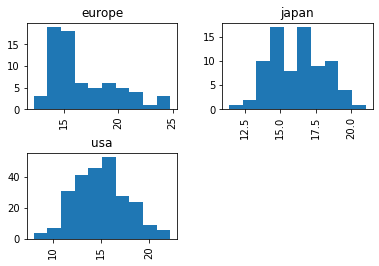

In [41]:
mpg['acceleration'].hist(by=mpg['origin'])

## Question 13. Calculate correlation of all the factors among themselves

In [42]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


## Question 14. Which factors (cylinders, horsepower or weight) will affect your mileage the most based on correlation?

Cylinders, displacement, horsepower, and weight can all affect mileage.
Weight affects mileage at the most since the it has the lowest value.
Comparing the mpg column to rows, those 4 rows have negative values from corelation table.
Negative correlation is a relationship between two variables whereby they move in opposite directions.

## Question 15. Does the result depend on the country? If yes, how?

I think the result depends on country, see the graphs below, the cars which made from usa are heavier than other two countries in overall. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EA43EB4E0>,
      dtype=object)

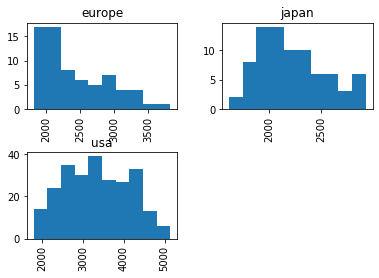

In [46]:
mpg['weight'].hist(by=mpg['origin'])